# Challenge
Unsupervised learning is one of the major learning paradigms in machine learning and it enables us to understand the patterns and relationships in the data without the guidance of ground truths in the data. Although many of the recent breakthroughs in machine learning in the previous decades came from the supervised learning front, unsupervised learning remains one of the most promising directions that the current data science and artificial intelligence can make use of. Although, we're living in a world with abundant amounts of data, labeling them with the ground truths is not an easy task as many times this requires costly and challenging human labor to annotate them. Unsupervised learning is of primary importance for data science as it has the potential to exploit enormous amounts of data without any need for annotation.

### Challenge
Throughout this module, we introduced the amazing and yet challenging domain of unsupervised learning by covering some of the most popular clustering and dimensionality reduction algorithms. Now, it's time for you to apply your unsupervised learning knowledge. In this challenge, you'll work with a dataset of your choice. As always, Kaggle is one of your best friends. You can spend some time on Kaggle and pick a beautiful dataset. Using this dataset:

+ Apply dimensionality reduction techniques to visualize the observations.
+ Apply clustering techniques to group together similar observations.

In each of the tasks above, try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.

In [552]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings #suppress warnings

# warnings.filterwarnings("ignore")
# %matplotlib inline

sns.set_style('darkgrid')

In [553]:
diabetes = pd.read_csv('/home/uzi/Downloads/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [554]:
def null_check(dataframe):
    # Missing value number and type detection
    for column_name in dataframe.columns:
        nan_list = []
        print("Problematic values: {}".format(column_name))
        for idx, value in enumerate(dataframe[column_name]):
            if pd.isnull(value):
                nan_list.append(str(value))
        # Determine percentage of rows that have null values
        num = dataframe[column_name].isnull().sum()*100/dataframe[column_name].isnull().count()
        print(
              len(nan_list), '/ {}%: '.format(round(num, 1)), set(nan_list)
             )

In [555]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [556]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> There are some fishy values in some of our variable. For the variables `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` and `BMI`, the value of zero doesn't make sense. So we will replace each opf these zero values with a 'Nan' value then run our null_check function to get a better sense of missing values.

In [557]:
diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [558]:
null_check(diabetes)

Problematic values: Pregnancies
0 / 0.0%:  set()
Problematic values: Glucose
5 / 0.7%:  {'nan'}
Problematic values: BloodPressure
35 / 4.6%:  {'nan'}
Problematic values: SkinThickness
227 / 29.6%:  {'nan'}
Problematic values: Insulin
374 / 48.7%:  {'nan'}
Problematic values: BMI
11 / 1.4%:  {'nan'}
Problematic values: DiabetesPedigreeFunction
0 / 0.0%:  set()
Problematic values: Age
0 / 0.0%:  set()
Problematic values: Outcome
0 / 0.0%:  set()


> For all the new 'Nan' values, well replace them with the mean value for their respective columns.

In [559]:
diabetes.fillna(diabetes.mean(), inplace=True)
null_check(diabetes)

Problematic values: Pregnancies
0 / 0.0%:  set()
Problematic values: Glucose
0 / 0.0%:  set()
Problematic values: BloodPressure
0 / 0.0%:  set()
Problematic values: SkinThickness
0 / 0.0%:  set()
Problematic values: Insulin
0 / 0.0%:  set()
Problematic values: BMI
0 / 0.0%:  set()
Problematic values: DiabetesPedigreeFunction
0 / 0.0%:  set()
Problematic values: Age
0 / 0.0%:  set()
Problematic values: Outcome
0 / 0.0%:  set()


In [560]:
# Checking our ground-truth classifications
print(diabetes.Outcome.unique())
print(np.bincount(y))

[1 0]
[268 500]


> With 1 indicating a diabetic individual, this dataset is unbalanced with 500 diabetic people vs. 268 non-diabetic people.
# K-means

In [561]:
# Define our features and target variable
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes.Outcome

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

> We run k-means by setting `n_clusters=2`, since we have two classes (diabetes or no diabetes) in our dataset. As with the modules, the numbers show the cluster each observation has been assigned to by the algorithm. The colors denote the true classes.

26.4 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


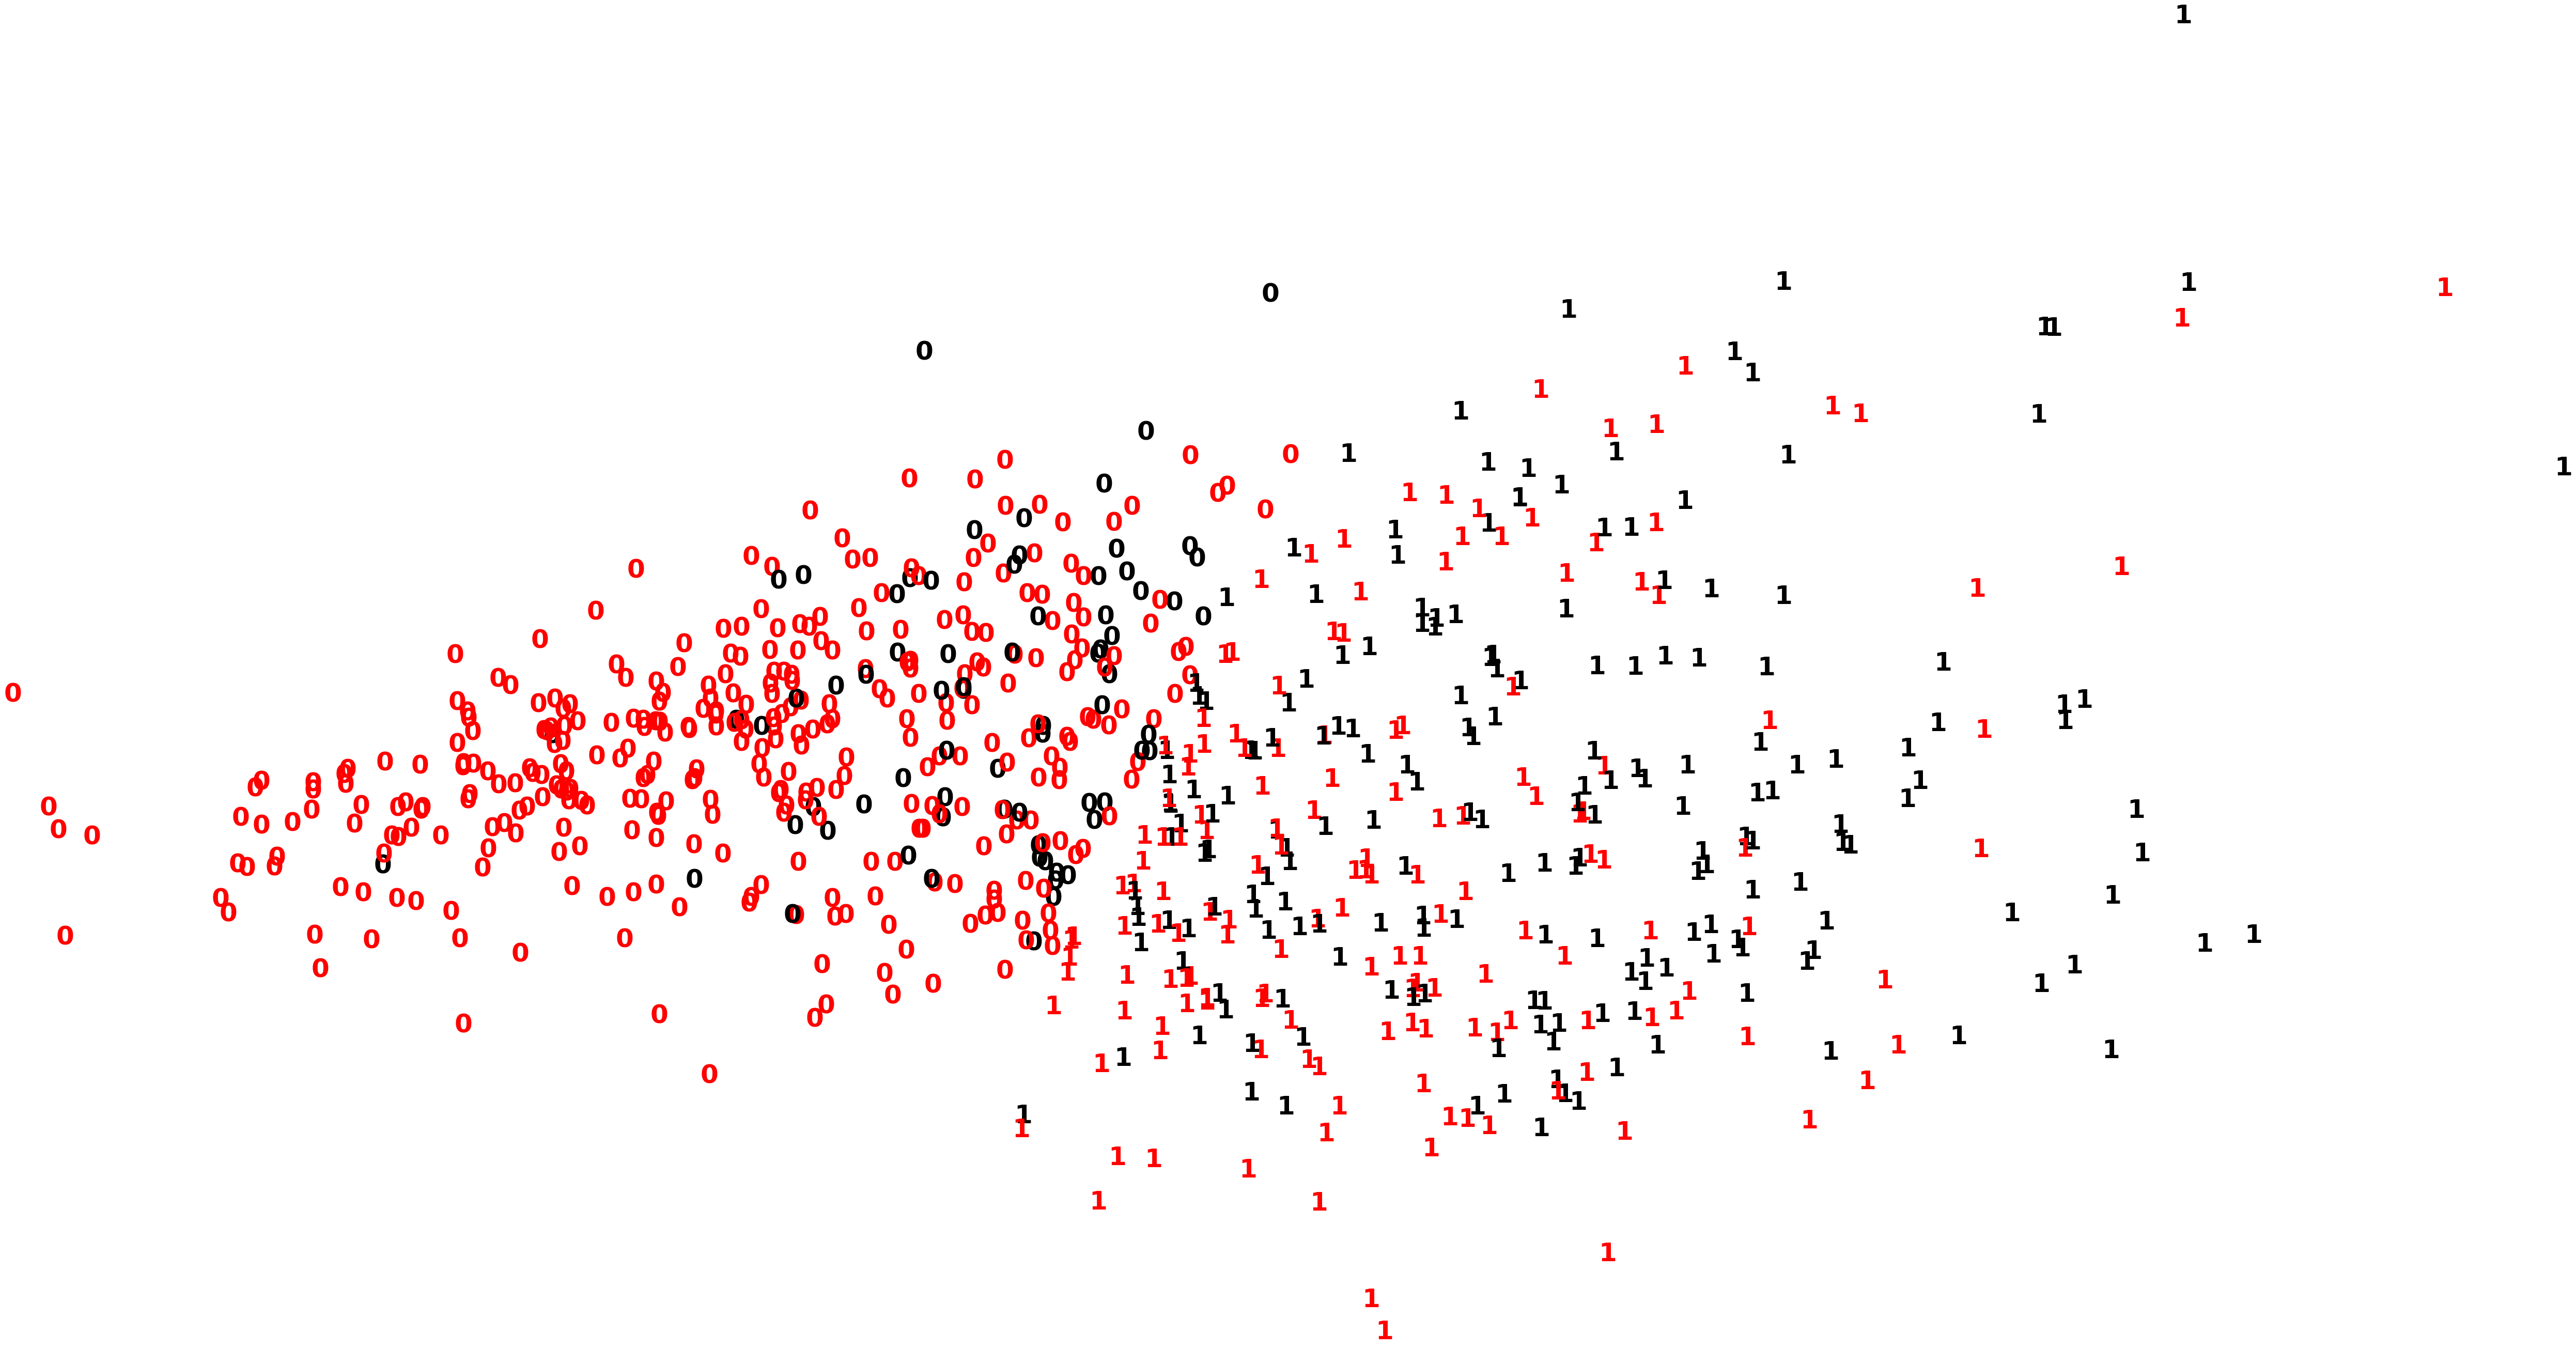

In [562]:
k_means = KMeans(n_clusters=2, random_state=123)
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rk'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [563]:
print(y[0], y_pred[0])

1 1


+ Since *y[0] = 1* and *colors[1] = 'k'*, we know that our first true observation is diabetic (*y[0] = 1*)and that the diabetic class has been designated as black ('k'). Therefore, the non-diabetic class has been designated with the color red and can be seen clustered predominantly on the left side of the plot. We'll use that as a reference going forward should the class designation colors ever switch.

> We can see that our classes are not linearly separable nor do they seem to be isotropic. We do, however see a majority of observations from our non-diabetic class (0) congregating separately from the diabetic (1) observations. Perhaps another clustering algorithm will perform better than k-means. Still, let's try mini-batch k-means:

9.96 ms ± 56.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


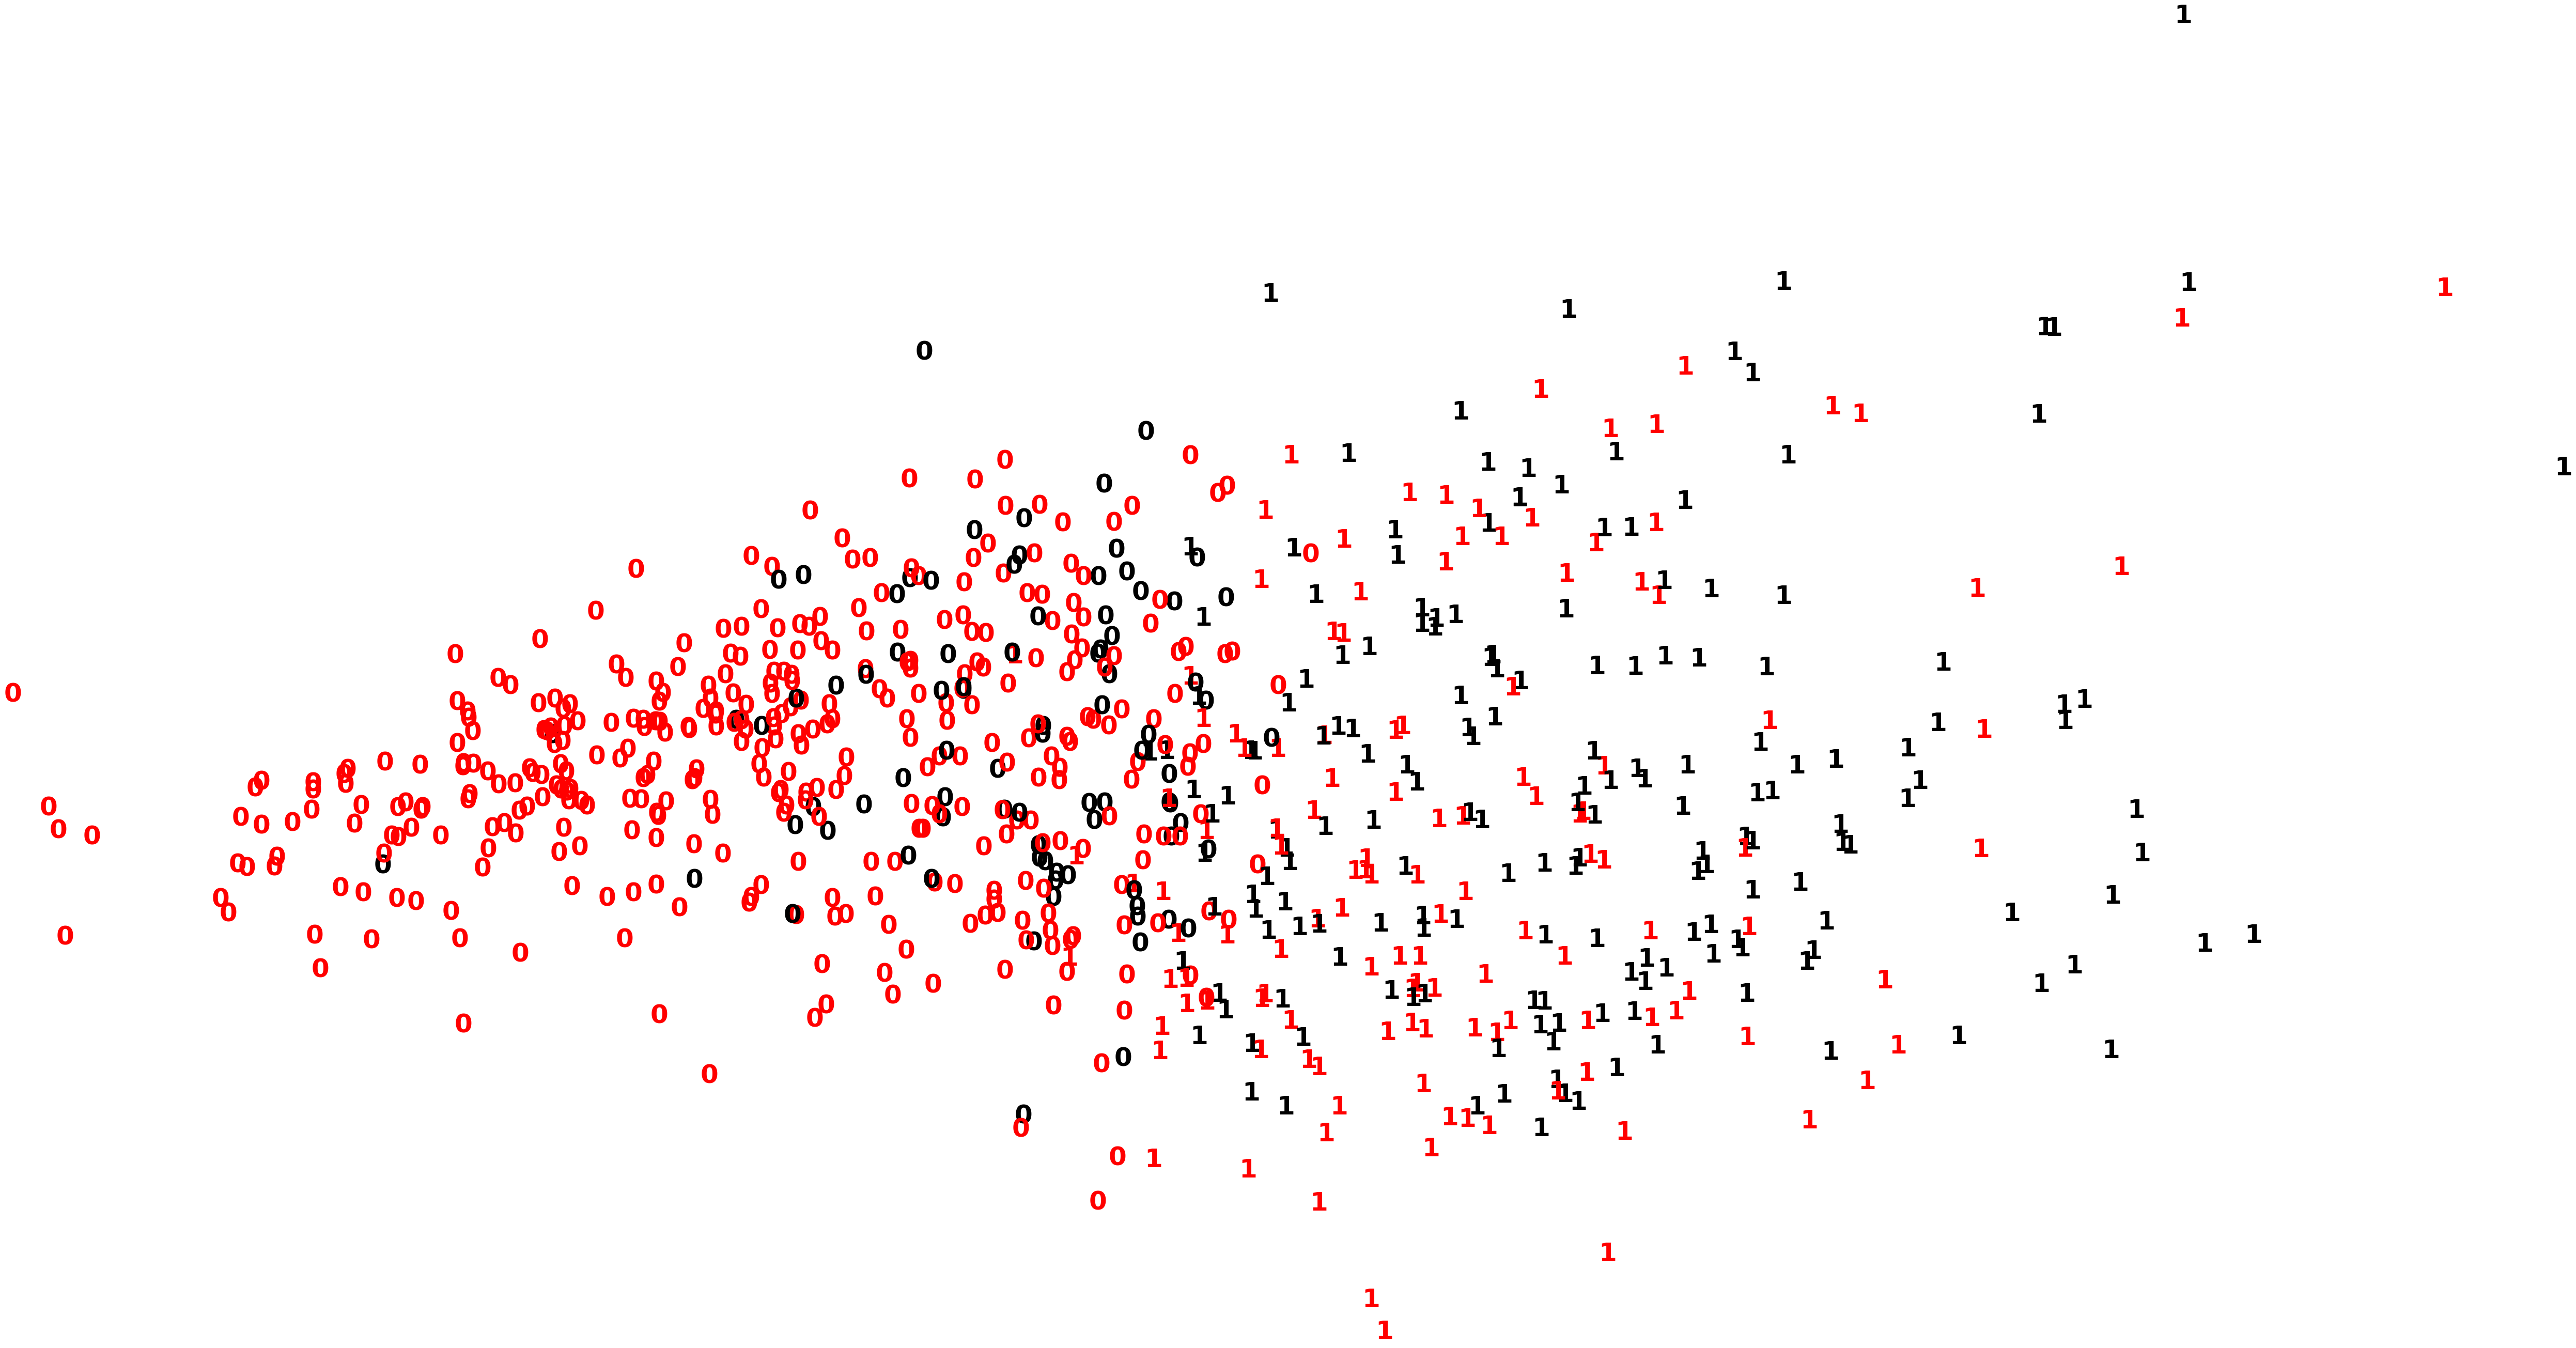

In [580]:
mini_kmeans = MiniBatchKMeans(n_clusters=2, random_state=123)
%timeit mini_kmeans.fit(X_std)
y_predmin = mini_kmeans.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rk'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_predmin[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

> There was no discernable improvement with the mini-batch k-means algorithm. It just runs faster than k-means, as expected. To visually see how the cluster prediction compares to the ground-truth data clusters, we plot both the mini-batch k-means predictions and the true classes below.

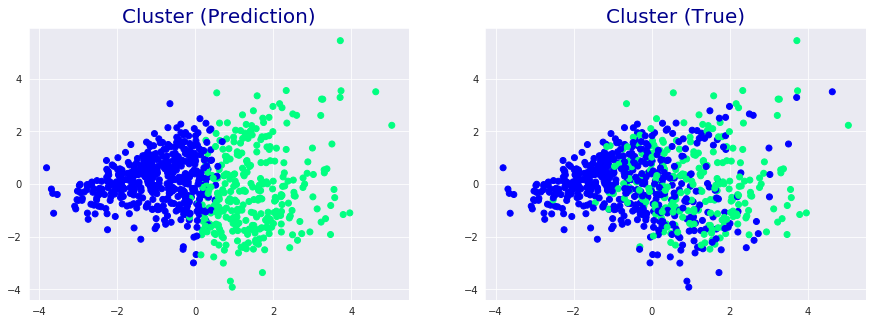

In [581]:
plt. figure(figsize=(15,5))

# Plot the PREDICTED classes.
plt.subplot(121)
plt.title('Cluster (Prediction)', size=20, c='darkblue')
plt.scatter(pca[:,0], pca[:,1], c=y_predmin, cmap='winter')

# Plot the TRUE classes.
plt.subplot(122)
plt.title('Cluster (True)', size=20, c='darkblue')
plt.scatter(pca[:,0], pca[:,1], c=y, cmap='winter')
plt.show()

In [566]:
# re-labeling (run  this cell until 371 is in the bottom right corner)
y2 = np.array([1 if x == 0 else 0 for x in y])
y_predmin = np.array([1 if x == 0 else 0 for x in y_predmin])

pd.crosstab(y2, y_predmin, rownames=['Actual'], colnames=['Predicted =>'])

Predicted =>,0,1
Actual,,
0,182,86
1,129,371




> Although we're classifying the majority of observations correctly with 553 out of 768, or 72%, we're still misclassifying 215 of the observations.
## Optimal K

> As *k* increases the average distance from each data point to it's respective centroid will decrease up to the point where, as *k* continues to increase, each data point becomes its own centroid and the distance from each data point to its centroid (which would be itself) is zero. Since the objective of the k-means clustering algorithm is to minimize intra-cluster variation, if left unchecked, the algorithm will always determine that `optimal k` = `n_observations`. However, at some value of *k*, the successive improvements in intra-cluster variation minimization will experience a sharp decline and the at that value of *k*, we find the optimal number for clusters for our classes (according to the algorithm). So, below we plot the *elbow method*, where we can visually detect at which point the sharp decline occurs. 

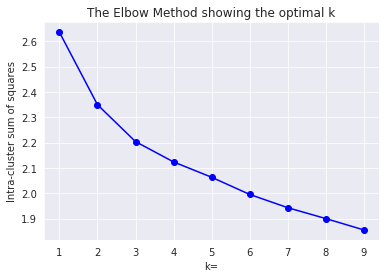

In [567]:
from scipy.spatial.distance import cdist

# k means to determine best k
## Intra-cluster sum of squares (iss)
iss = []
for k in range(1,10):
    k_means = KMeans(n_clusters=k).fit(X_std)
    k_means.fit(X_std)
    iss.append(sum(np.min(cdist(X_std, k_means.cluster_centers_, 'euclidean'), axis=1)) / X_std.shape[0])

# Plot the elbow
plt.plot(range(1,10), iss, 'bo-')
plt.xlabel('k=')
plt.ylabel('Intra-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

> It appears as if the optimal k-value is not being detected between the values of 1 and 9. Below, we'll appoly two tests to evaluate the performance of our clustering models.

In [568]:
print(f'ARI for K-means: {metrics.adjusted_rand_score(y, y_pred)}')
print(f'ARI for Mini-batch K-means: {metrics.adjusted_rand_score(y, y_predmin)}')
print('-'*50)
print(f"Silhouette score for K-means: {metrics.silhouette_score(X_std, y_pred, metric='euclidean')}")
print(f"Silhouette score for Mini-batch K-means: {metrics.silhouette_score(X_std, y_predmin, metric='euclidean')}")

ARI for K-means: 0.1635248013393282
ARI for Mini-batch K-means: 0.19009579864611706
--------------------------------------------------
Silhouette score for K-means: 0.19651283197353717
Silhouette score for Mini-batch K-means: 0.20509321434375158


> Both our k-means models are not clustering well. Even though our solution is closer to perfect than to random (ARI score), it's still falling far short of perfection. Our silhouette scores indicate that our intra-cluster datapoints are at least closer to each other than datapoints in other clusters, but also indicate room for improvement.
# Hierarchical/Agglomerative clustering

In [569]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from tqdm import tqdm # show progress bar
import time # time random searches

In [461]:
########################################################################
#########    Creating a function in order to quickly call upon    ######
#########         the model with different parameters             ######
########################################################################

def Agglo_RandomSearch(X, y, linkage=['complete','average'], # we exclude 'ward' since it only 
                                                             # works with euclidean distance
                             affinity=['euclidean', 'manhattan','cosine'],
                             n_clusters=[2,3,4]
                       ):
    
    hyperparams = dict(
                       linkage=linkage,
                       affinity=affinity,
                       n_clusters=n_clusters
                      )

    hyper_table = list()

    # Timed for loop...start the clock!
    start_time = time.time()
    for trial in tqdm(range(10), position=0):
        params = dict()
        for k, v in hyperparams.items():
            i = np.random.randint(len(v))
            params[k] = v[i]
        # Defining the agglomerative clustering
        agg_cluster = AgglomerativeClustering(**params)
        # Fit model
        clusters = agg_cluster.fit_predict(X)
        params['ARI score'] = metrics.adjusted_rand_score(y, clusters)
        params['Silhouette score'] = metrics.silhouette_score(X, clusters, metric='euclidean')
        
        # Store our parameters and score in a dataframe
        hyper_table.append(params)

        end_time = time.time()

    print(f'Execution time: {round(end_time - start_time, 2)} seconds')
    hyper_table = pd.DataFrame(data=hyper_table)
    return hyper_table.sort_values(by='ARI score', ascending=False)

In [292]:
Agglo_RandomSearch(X_std, y)

100%|██████████| 10/10 [00:00<00:00, 37.67it/s]

Execution time: 0.27 seconds


,linkage,affinity,n_clusters,ARI score,Silhouette score
5,complete,cosine,3,0.141467,0.121548
2,average,cosine,4,0.049522,0.116310
4,average,cosine,2,0.048153,0.123806
0,complete,manhattan,3,0.036003,0.318718
6,complete,euclidean,3,0.021784,0.427947
7,complete,euclidean,3,0.021784,0.427947
3,complete,euclidean,4,0.021771,0.424397
1,average,manhattan,4,0.007796,0.516824
9,average,euclidean,3,0.007793,0.540313
8,average,manhattan,2,0.005535,0.544023


> It's clear that various parameter combinations of the agglomerative clustering model all reach lower ARI scores than k-means. Most of our solutions are just barely better than random. The silhouette scores range from worse than k-means to far better. Our silhouette scores have climbed up to 0.54 from our k-means scores of about 0.2, which would suggest that our clusters are now closer to intra-cluster datapoints than outer cluster datapoints. However, let's plot the clusters, using parameters from our highest silhouette scoring combination, and see what's going on.

**Note**: since the previous cell is a random search, future execiutions of that cell may not yield the same score discussed in the previous paragraph nor the parameter combination I'm going to use on the next cell (linkage='average', affinity='manhattan', n_clusters=2).

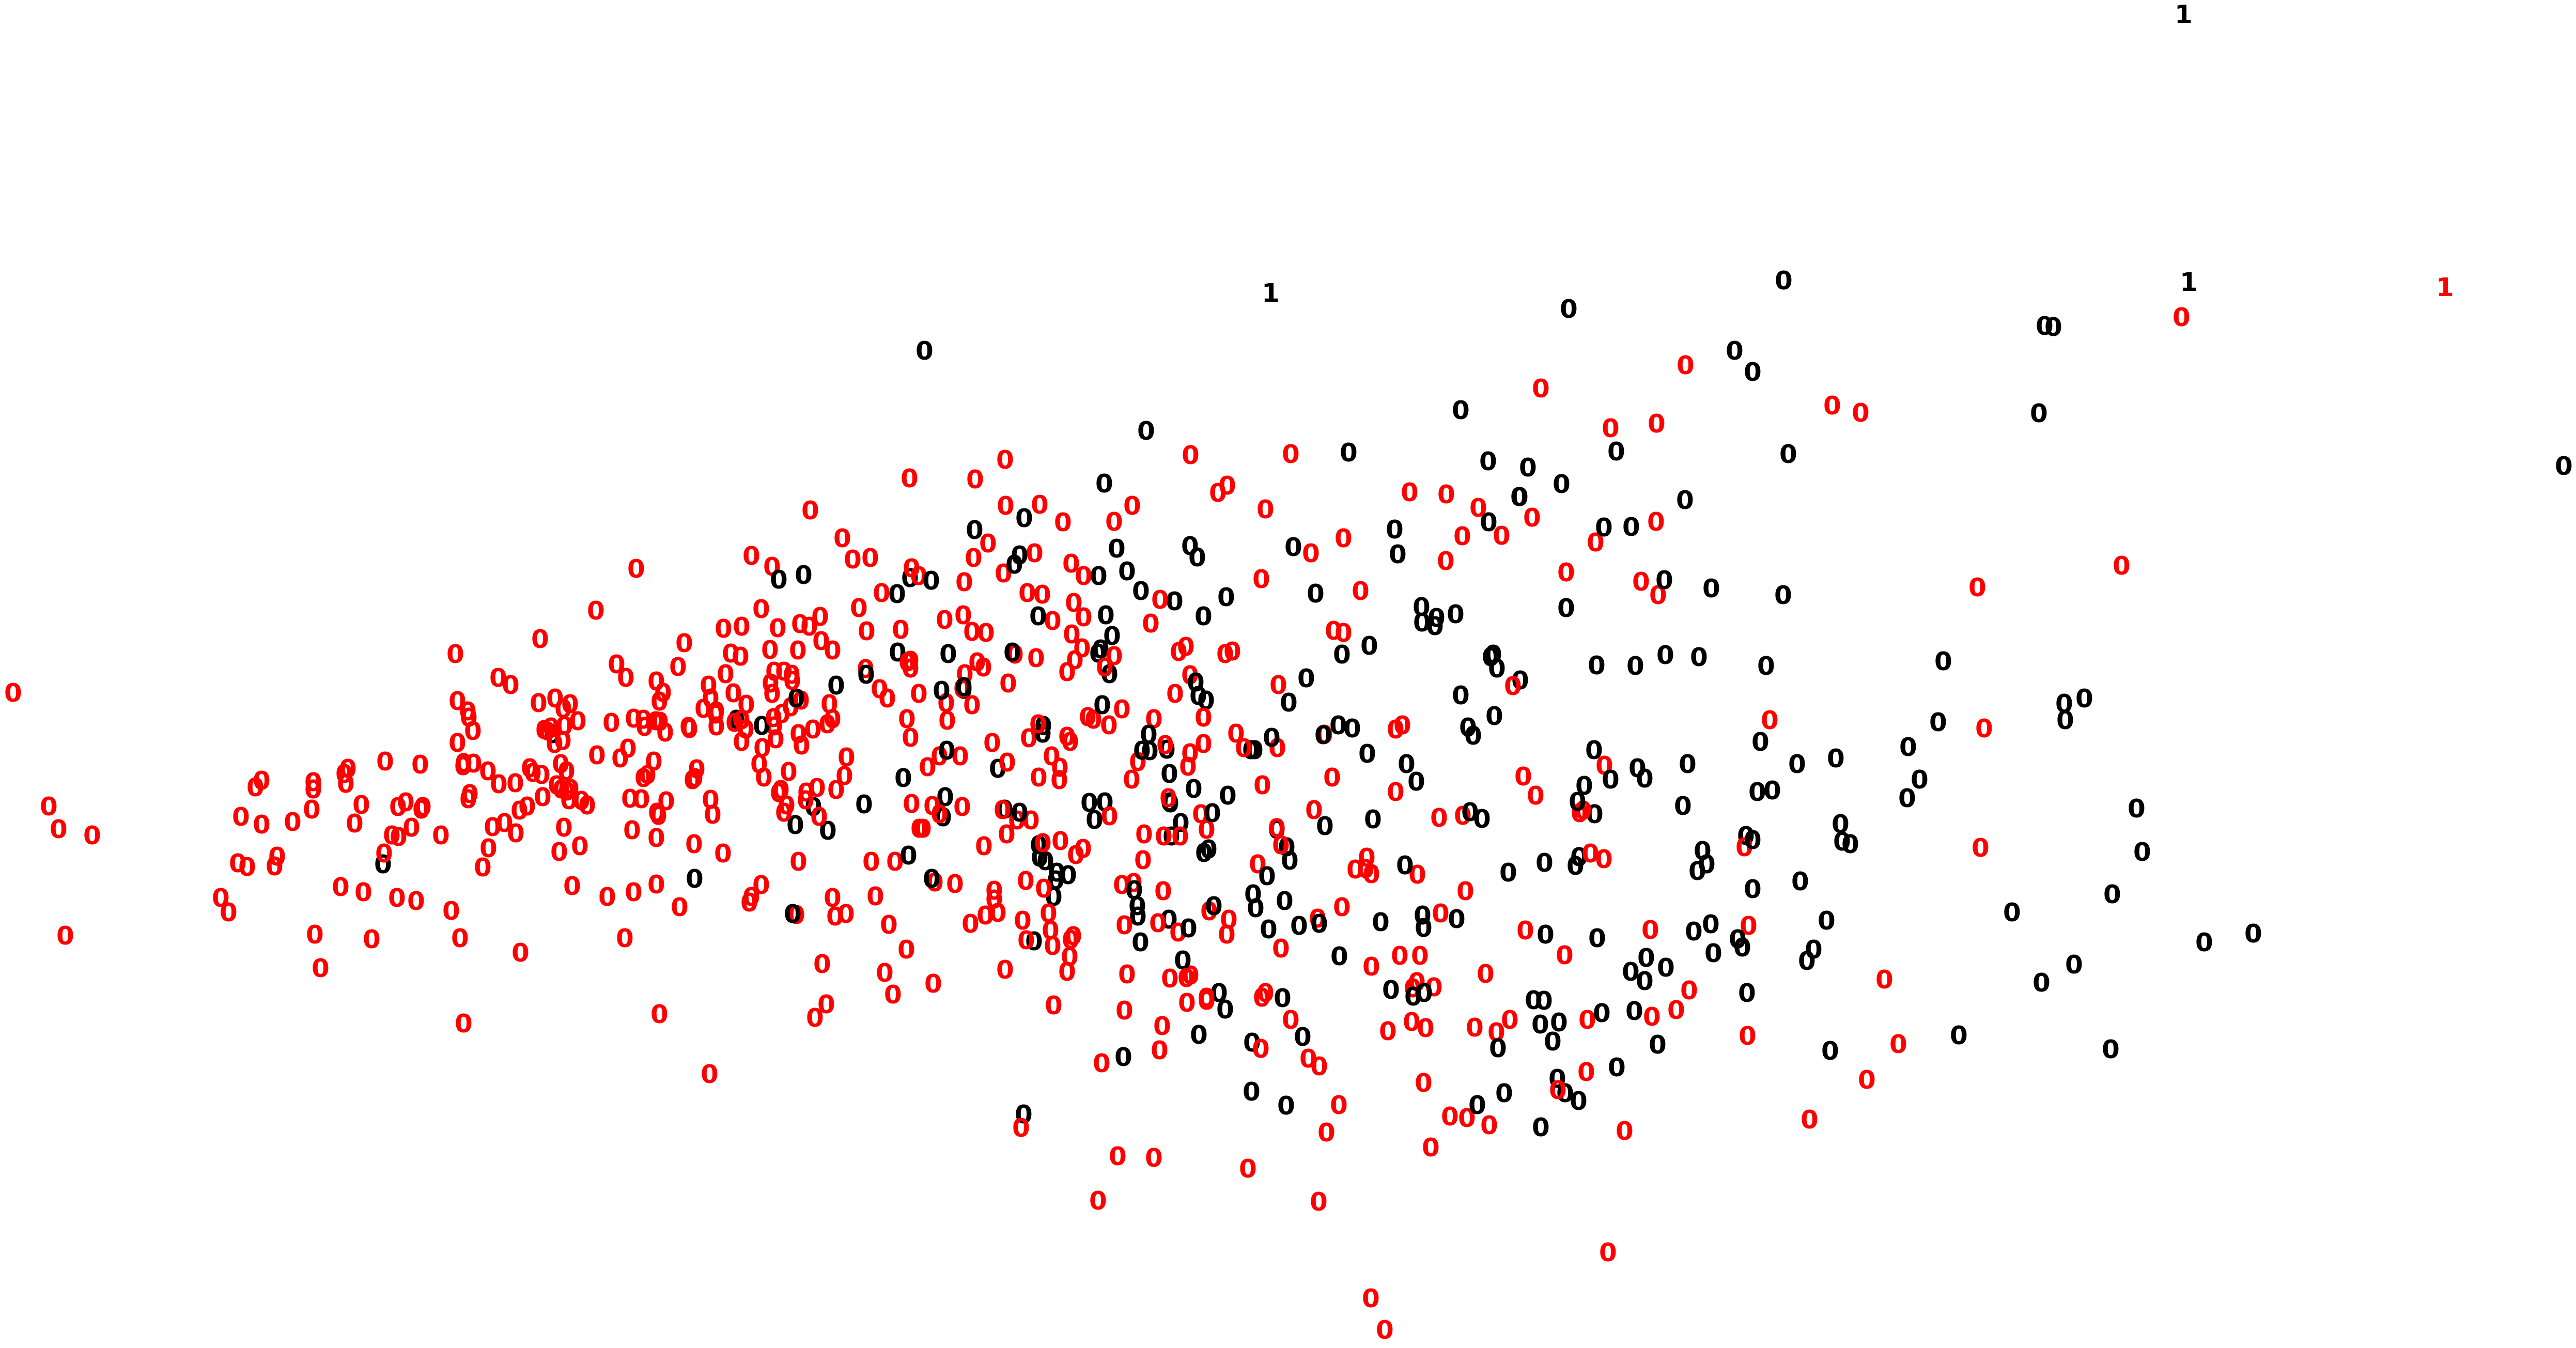

In [570]:
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='manhattan',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rk'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

> As you can see, the models simply clustered nearly all the datapoints into one group. Naturally, as you include more datapoints into a cluster of the same area, the intra-cluster diastance between points will be smaller. We can confirm that computationally, below.

In [571]:
print(f'Unique values: {pd.Series(clusters).unique()}')
print(f'Bincount: {np.bincount(pd.Series(clusters))}')

Unique values: [0 1]
Bincount: [764   4]


# DBSCAN

In [572]:
from sklearn.cluster import DBSCAN

In [524]:
########################################################################
#########    Creating a function in order to quickly call upon    ######
#########         the model with different parameters             ######
########################################################################

def DBSCAN_RandomSearch(X, y, eps=[1.4, 1.5, 1.6],
                              min_samples=[9, 10, 11],
                       ):
    
    hyperparams = dict(
                       eps=eps,
                       min_samples=min_samples
                      )

    hyper_table = list()

    # Timed for loop...start the clock!
    start_time = time.time()
    for trial in tqdm(range(10), position=0):
        params = dict()
        for k, v in hyperparams.items():
            i = np.random.randint(len(v))
            params[k] = v[i]
        # Defining the agglomerative clustering
        dbscan_cluster = DBSCAN(**params)
        # Fit model
        clusters = dbscan_cluster.fit_predict(X)
        params['ARI score'] = metrics.adjusted_rand_score(y, clusters)
        params['Silhouette score'] = metrics.silhouette_score(X, clusters, metric='euclidean')
        
        # Store our parameters and score in a dataframe
        hyper_table.append(params)

        end_time = time.time()

    print(f'Execution time: {round(end_time - start_time, 2)} seconds')
    hyper_table = pd.DataFrame(data=hyper_table)
    return hyper_table.sort_values(by='ARI score', ascending=False)

In [359]:
DBSCAN_RandomSearch(X_std,y)

100%|██████████| 10/10 [00:00<00:00, 34.86it/s]

Execution time: 0.29 seconds


,eps,min_samples,ARI score,Silhouette score
7,1.6,11,0.110568,0.217151
9,1.5,9,0.105287,0.201123
3,1.5,10,0.104800,0.193887
4,1.5,10,0.104800,0.193887
6,1.5,10,0.104800,0.193887
0,1.4,9,0.095189,0.159896
8,1.4,9,0.095189,0.159896
5,1.4,10,0.091317,0.152974
1,1.6,10,0.089943,0.224902
2,1.4,11,0.074007,0.148300


> Compared to our k-means scores, even our best ARI score falls short while the best silhouette score is only a modest improvement.

**Note:** the previous hyperparameter ranges were decided on by trial and error.

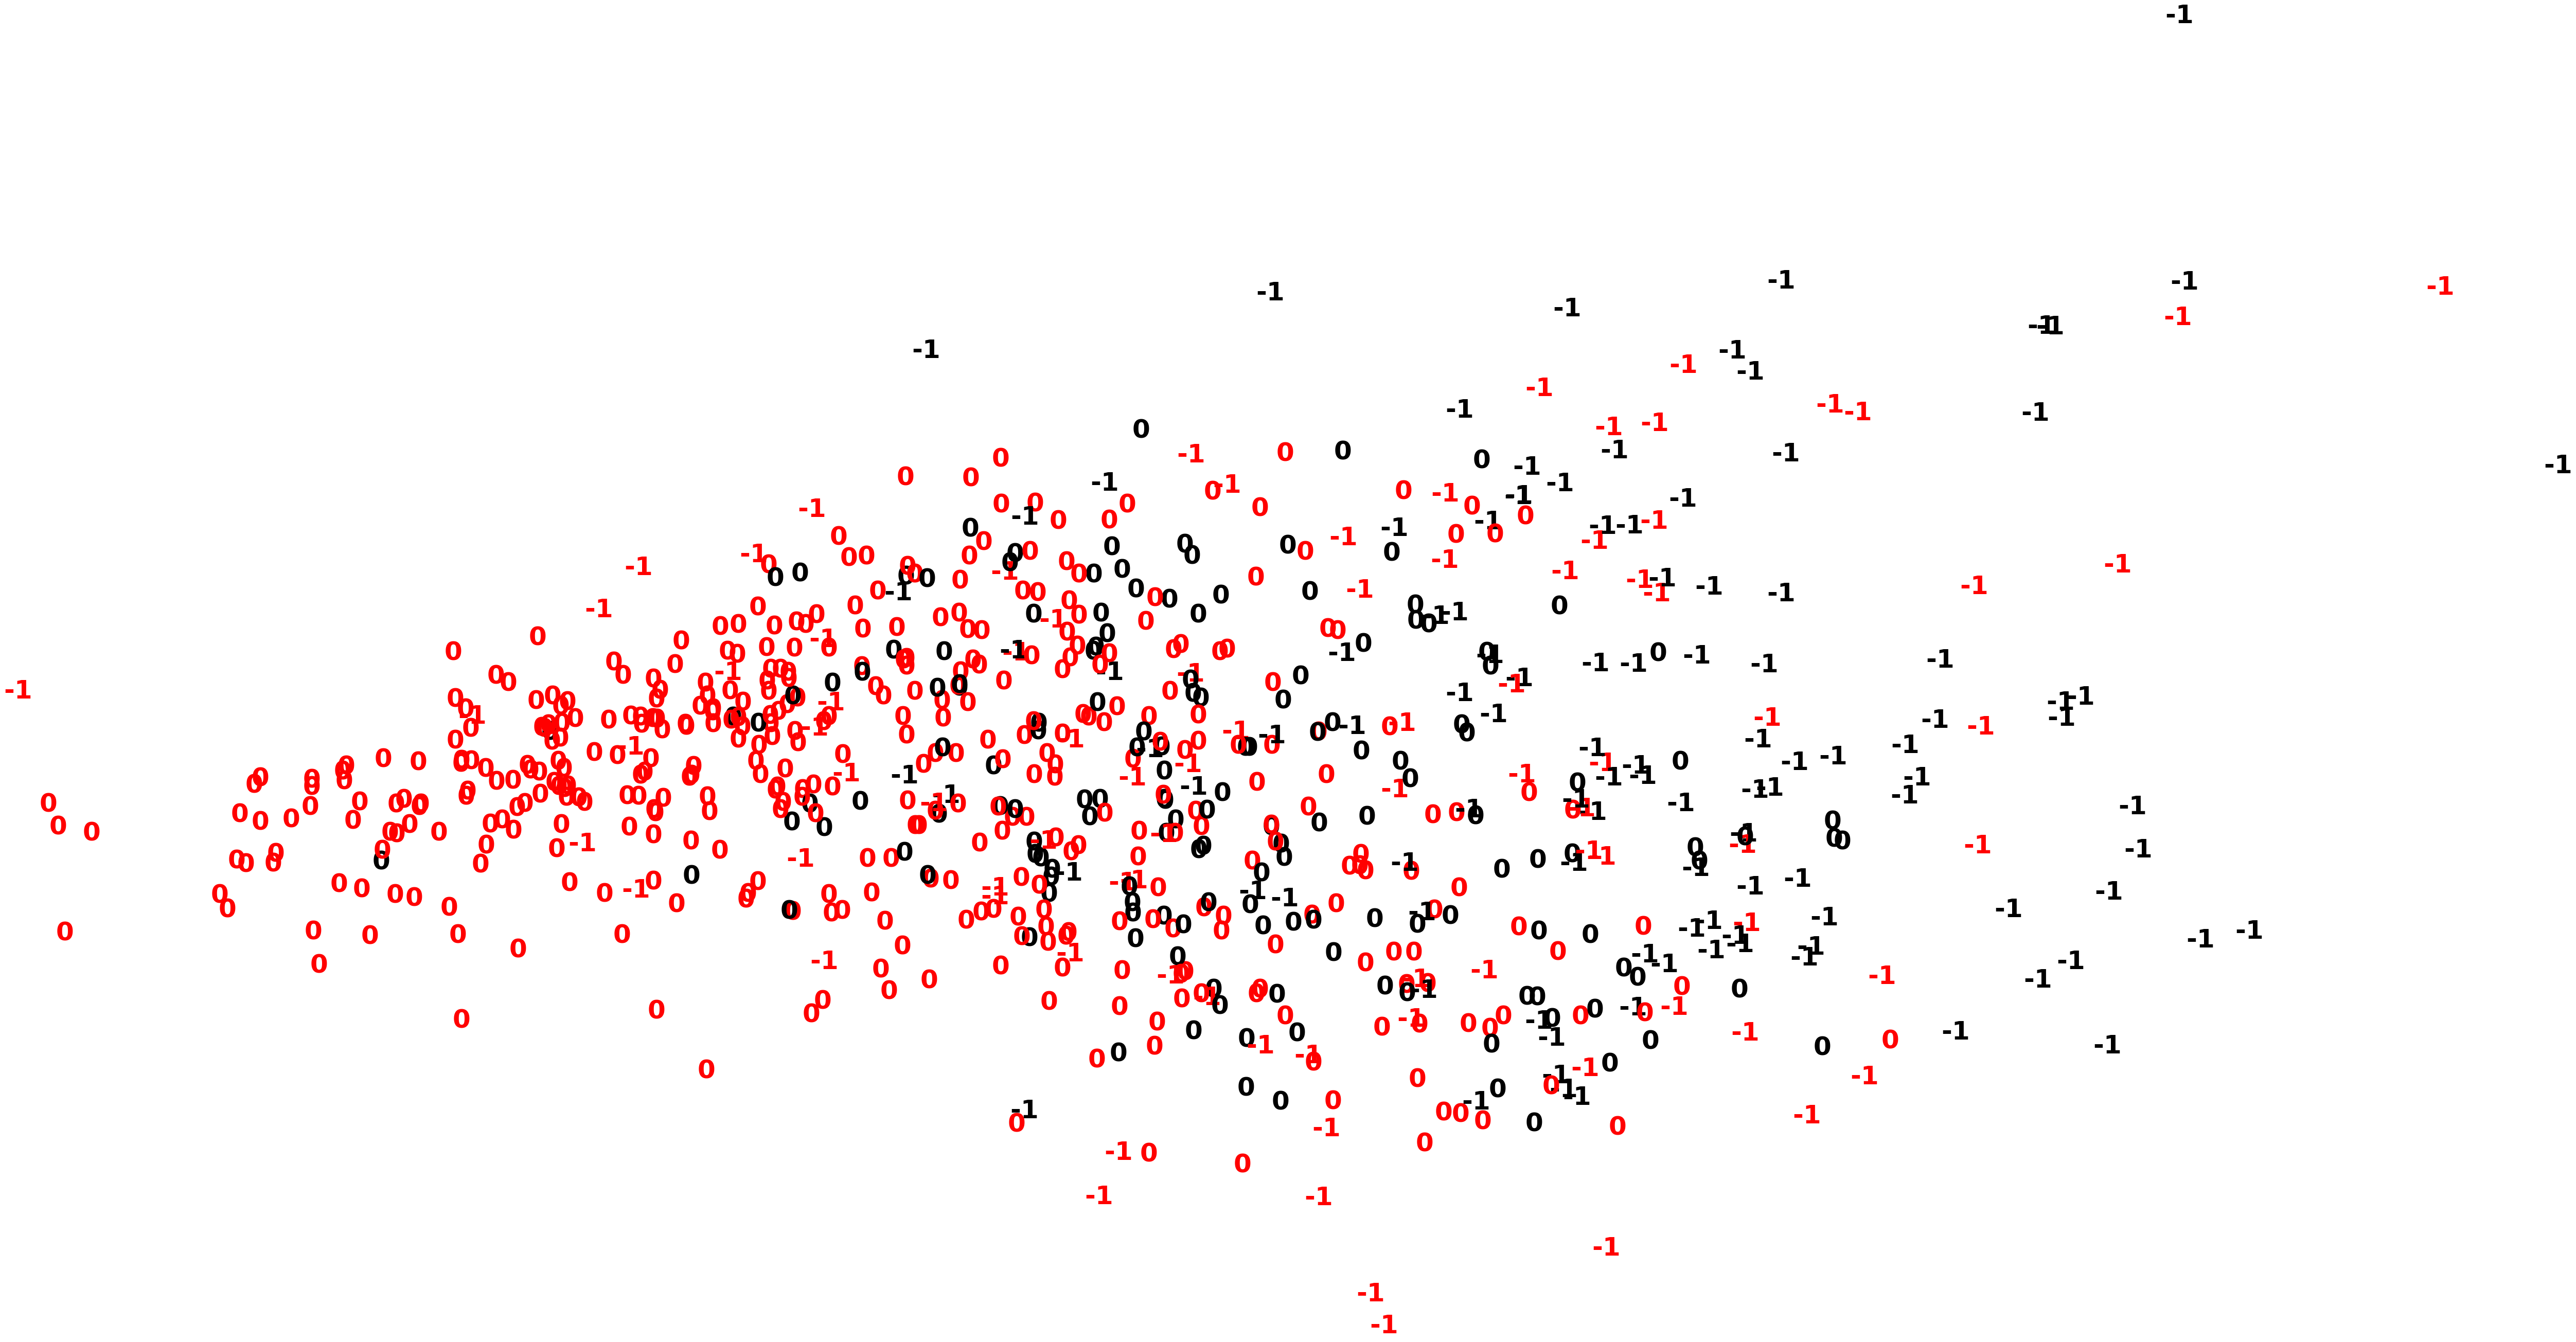

In [573]:
dbscan_cluster = DBSCAN(eps=1.6, min_samples=11)
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rk'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

> There's a lot of noise points not assigned to a cluster. In fact, it doesn't seem to indentify but one cluster at all.

# Gaussian Mixture Models (GMM)

In [585]:
from sklearn.mixture import GaussianMixture

In [654]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

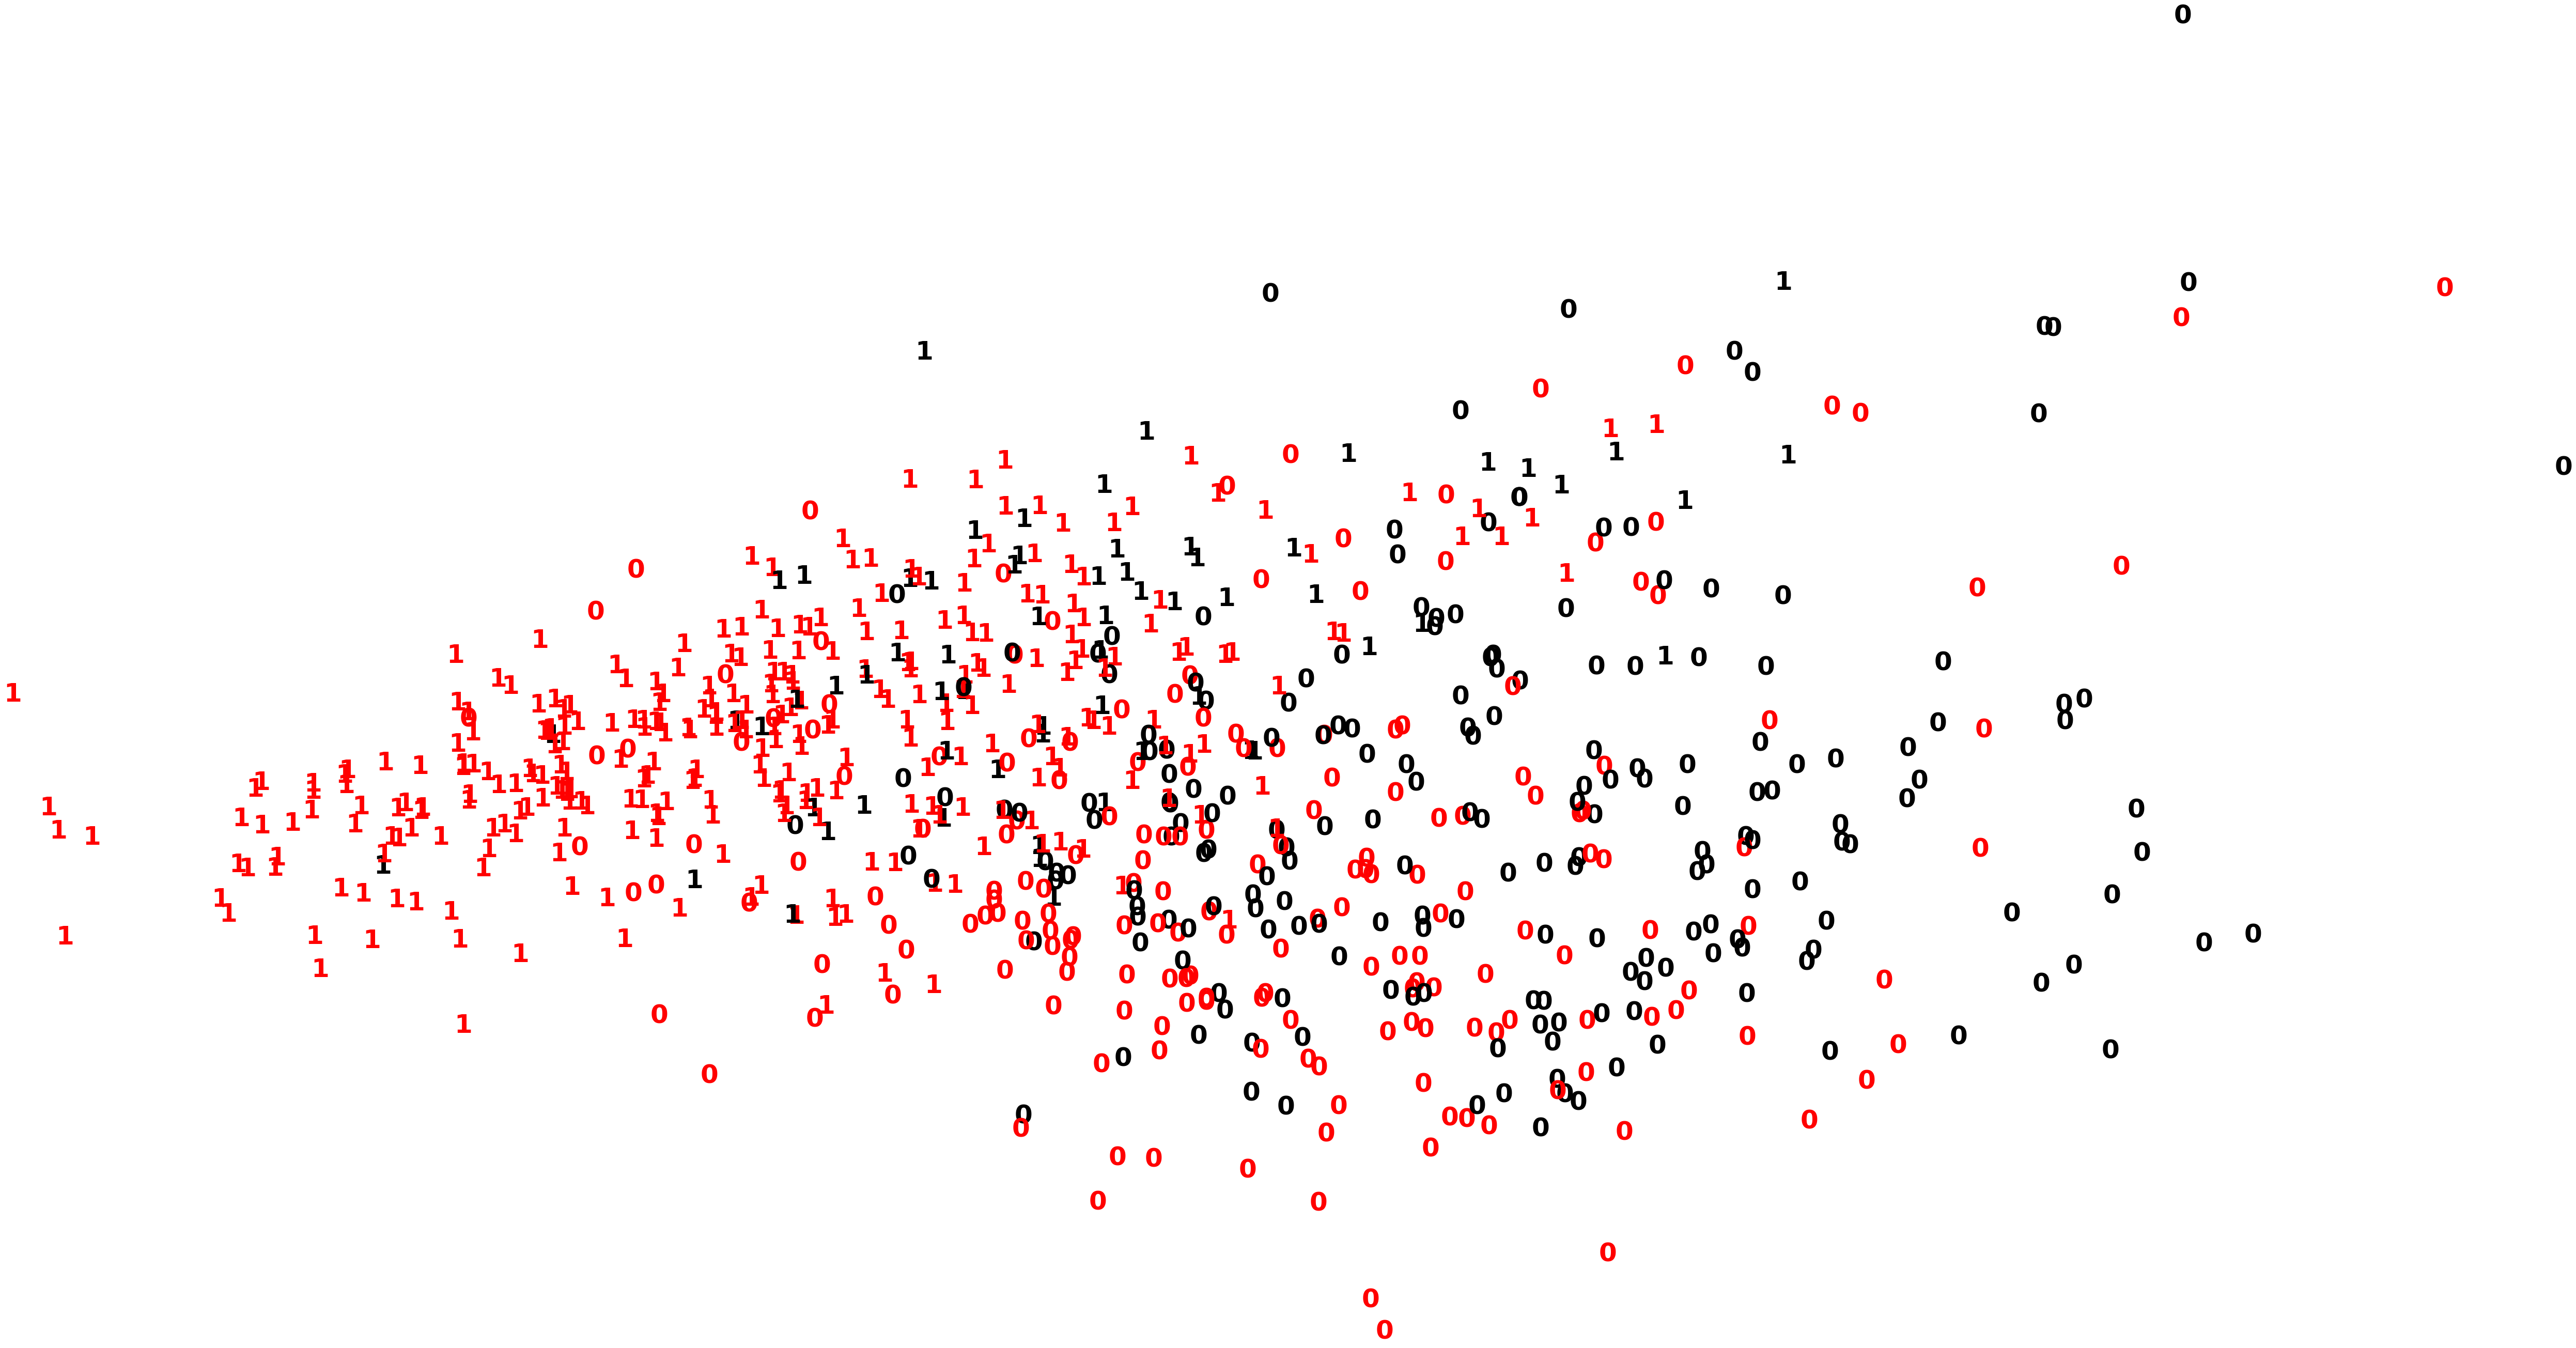

In [655]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rk'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [656]:
print("ARI of the GMM solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI of the GMM solution: 0.10825933442906831
The silhoutte score of the GMM solution: 0.15520434072818703


> This clustering algorithm performs better than agglomerative clustering but still falls short of k-means in both ARI and silhouette score. We check our crosstab table for comparison.

In [657]:
#re-label
y2 = np.array([0 if x == 1 else 1 for x in y])
pd.crosstab(y2, clusters)

col_0,0,1
row_0,,
0,203,65
1,192,308


> We're now only classifying 511 observations correctly, down from the 553 correct classifications we witnessed with k-means.

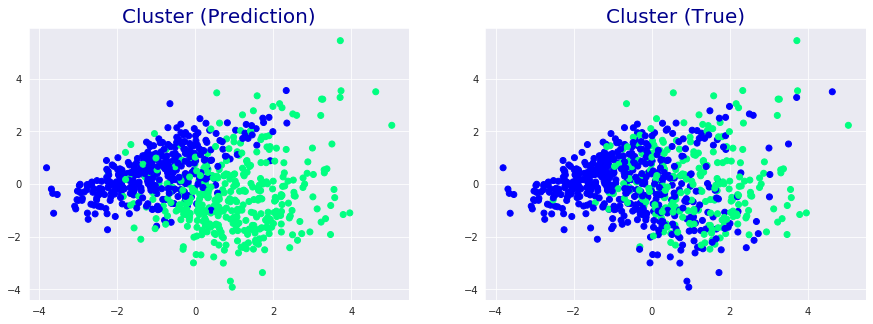

In [658]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('Cluster (Prediction)', size=20, c='darkblue')
plt.scatter(pca[:, 0], pca[:, 1], c=clusters, cmap='winter_r')

plt.subplot(122)
plt.title('Cluster (True)', size=20, c='darkblue')
plt.scatter(pca[:, 0], pca[:, 1], c=y, cmap='winter')

plt.show()

# t-SNE: Dimensionality reduction

In [628]:
from sklearn.manifold import TSNE

In [621]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.004s...
[t-SNE] Computed neighbors for 768 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 0.916933
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.060379
[t-SNE] KL divergence after 300 iterations: 1.204916
t-SNE done! Time elapsed: 1.5851953029632568 seconds


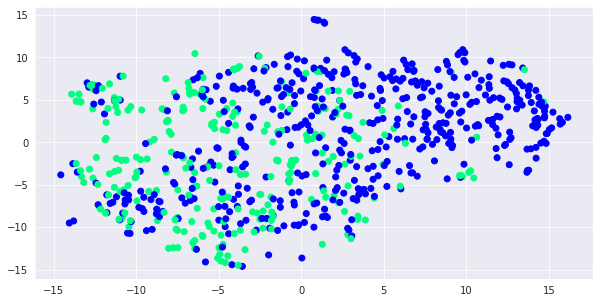

In [659]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y, cmap='winter')

plt.show()

# UMAP: Dimensionality reduction

In [627]:
import umap

In [630]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 2.3940393924713135 seconds


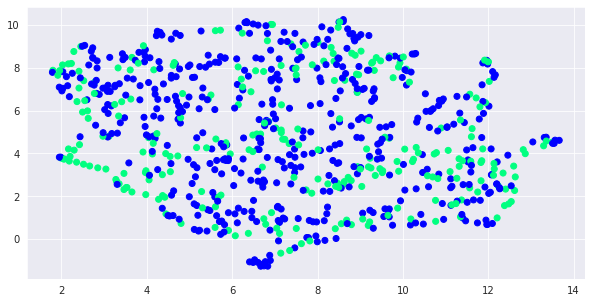

In [662]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=y, cmap='winter')
plt.show()

> The UMAP and t-SNE dimensionality reductions images look worse than the PCA images as far as discerning any recognizable cluster distinctions.